In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
#open FITS file
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:

image_data = hdu_list[0].data

In [5]:
#Our data is now stored as a 2-D numpy array. But how do we know the dimensions of the image?
#we can simply look at the shape of the array
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [6]:
#at this point, we can close the FITS file because we've stored everything we wanted to a variable.
hdu_list.close()

In [7]:
#use "getdata() to just read in the image data and close the file
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


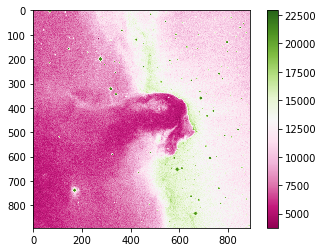

In [31]:
#lets show the data
plt.imshow(image_data, cmap='PiYG')
plt.colorbar()

In [32]:
print('Min:',np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:',np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


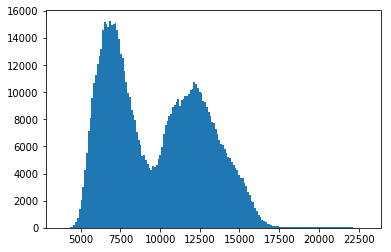

In [33]:
#plotting a histogram
histogram = plt.hist(image_data.flatten(), bins='auto')

In [35]:
#displaying the image with a logarithmic scale
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

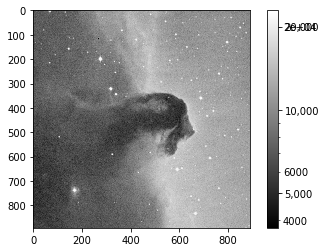

In [37]:
plt.imshow(image_data,cmap='gray',norm=LogNorm())

# Choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

Stacking Image
since the noise in an image results from a random process, we use stacking of separate images to improve the signal to noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10inch telescope.

In [43]:
#make a list of filenames
image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits',\
            'M13_blue_0004.fits', 'M13_blue_0005.fits']

In [44]:
image_concat = [fits.getdata(image) for image in image_list]

In [45]:
#sum the images together
final_image = np.sum(image_concat,axis=0)

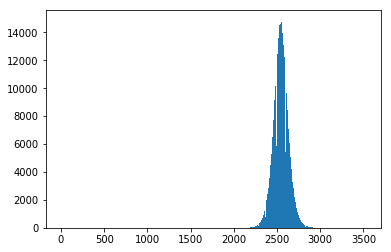

In [46]:
image_hist = plt.hist(final_image.flatten(), bins='auto')

In [ ]:
#use the keywords vmin and vmax to set limits on the color scaling for imshow

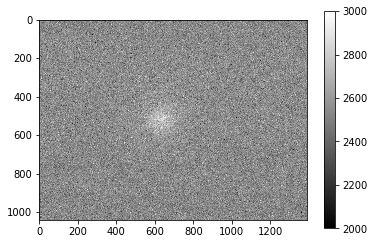

In [54]:
plt.imshow(final_image,cmap='gray',vmin=2E3, vmax = 3E3)
plt.colorbar()

In [55]:
#writing a new FITS file
#can easily do this with the writeto()method.
outfile = 'stacked_M13_blue.fits'
hdu= fits.PrimaryHDU(final_image)
hdu.writeto(outfile,overwrite=True)